<a href="https://colab.research.google.com/github/alex-antonison-mtsu/demo-notebooks/blob/main/pittsburgh_data_analysis_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install skimpy==0.0.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving demo-epa-data.csv to demo-epa-data.csv
User uploaded file "demo-epa-data.csv" with length 105210496 bytes


In [36]:
import pandas as pd
import skimpy
import numpy as np
import datetime
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, theme, element_text, ylim

In [3]:
df_src = pd.read_csv("demo-epa-data.csv", low_memory=False)
df_src.head()

,Area of Concern,Parameter,Manufacturer Sensor,Station Name,Site Name,Field Date Time (ET),value
0,Motionless River,Dissolved Oxygen (%),ysi,ARR02,Alicia Rest River,2020-09-13 00:00:49,-50.000
1,Motionless River,Temperature (C),solinst,STR01,Scott Throughway River,2021-03-31 06:32:24,-7.224
2,Motionless River,Temperature (C),solinst,STR01,Scott Throughway River,2021-02-15 09:32:24,-7.222
3,Motionless River,Temperature (C),solinst,STR01,Scott Throughway River,2021-02-15 10:02:24,-7.221
4,Motionless River,Temperature (C),solinst,STR01,Scott Throughway River,2021-02-15 09:02:24,-7.219


In [4]:
df_src_clean_column = skimpy.clean_columns(df_src)
df_src_clean_column["field_date_et"] = pd.to_datetime(df_src_clean_column["field_date_time_et"]).dt.date
df_src_clean_column.head()

,area_of_concern,parameter,manufacturer_sensor,station_name,site_name,field_date_time_et,value,field_date_et
0,Motionless River,Dissolved Oxygen (%),ysi,ARR02,Alicia Rest River,2020-09-13 00:00:49,-50.000,2020-09-13
1,Motionless River,Temperature (C),solinst,STR01,Scott Throughway River,2021-03-31 06:32:24,-7.224,2021-03-31
2,Motionless River,Temperature (C),solinst,STR01,Scott Throughway River,2021-02-15 09:32:24,-7.222,2021-02-15
3,Motionless River,Temperature (C),solinst,STR01,Scott Throughway River,2021-02-15 10:02:24,-7.221,2021-02-15
4,Motionless River,Temperature (C),solinst,STR01,Scott Throughway River,2021-02-15 09:02:24,-7.219,2021-02-15


In [5]:
df_src_mean = df_src_clean_column.groupby(by=["area_of_concern", "parameter", "manufacturer_sensor", "station_name", "site_name", "field_date_et"]).mean()
df_src_mean = df_src_mean.reset_index()
df_src_mean.head()

,area_of_concern,parameter,manufacturer_sensor,station_name,site_name,field_date_et,value
0,Digley Reservoir,Conductivity (ms/cm),solinst,DMR02,Diaz Mills River,2021-08-10,249.878261
1,Digley Reservoir,Conductivity (ms/cm),solinst,DMR02,Diaz Mills River,2021-08-11,289.843750
2,Digley Reservoir,Conductivity (ms/cm),solinst,DMR02,Diaz Mills River,2021-08-12,342.508333
3,Digley Reservoir,Conductivity (ms/cm),solinst,DMR02,Diaz Mills River,2021-08-13,388.991667
4,Digley Reservoir,Conductivity (ms/cm),solinst,DMR02,Diaz Mills River,2021-08-14,226.808333


In [6]:
# df = df.pivot(index=["area_of_concern", "manufacturer_sensor", "station_name", "site_name"], columns="parameter", values="value")

df_pivot = pd.pivot_table(df_src_mean, index=["area_of_concern", "manufacturer_sensor", "site_name", "station_name", "field_date_et"], columns="parameter", values="value")
df_pivot = df_pivot.reset_index()
df_pivot_clean = skimpy.clean_columns(df_pivot)
df_pivot_clean.head()

,area_of_concern,manufacturer_sensor,site_name,station_name,field_date_et,conductivity_ms_cm,depth_at_instrument_on_mooring_m,dissolved_oxygen_%,dissolved_oxygen_mg_l,orp_m_v,resistance_m_ohm_cm,specific_conductivity_u_s,temperature_c,turbidity_ntu,p_h
0,Digley Reservoir,minidot,Diaz Mills River,DMR01,2021-08-10,NaN,NaN,1.175094,0.096562,NaN,NaN,NaN,23.977313,NaN,NaN
1,Digley Reservoir,minidot,Diaz Mills River,DMR01,2021-08-11,NaN,NaN,1.207656,0.100271,NaN,NaN,NaN,24.543792,NaN,NaN
2,Digley Reservoir,minidot,Diaz Mills River,DMR01,2021-08-12,NaN,NaN,1.052906,0.088229,NaN,NaN,NaN,24.235062,NaN,NaN
3,Digley Reservoir,minidot,Diaz Mills River,DMR01,2021-08-13,NaN,NaN,0.417223,0.035125,NaN,NaN,NaN,23.988479,NaN,NaN
4,Digley Reservoir,minidot,Diaz Mills River,DMR01,2021-08-14,NaN,NaN,1.339660,0.114000,NaN,NaN,NaN,23.329292,NaN,NaN


In [19]:
#@title Parameter Input
#@markdown Please type in a parameter seen above

parameter_input = 'dissolved_oxygen_mg_l'  #@param {type: "string"}
#@markdown ---

In [21]:
list(df_pivot_clean[~np.isnan(df_pivot_clean[parameter_input])]["station_name"].unique())

['DMR01',
 'DMR03',
 'DMR04',
 'DMR05',
 'DMR06',
 'DMR07',
 'DMR09',
 'DMR10',
 'ARR01',
 'ARR02',
 'ARR03',
 'ARR04',
 'ARR05',
 'ACR01',
 'ACR02',
 'ACR04',
 'DVR03',
 'DVR04',
 'STR01',
 'STR03',
 'STR05',
 'STR4',
 'STR02',
 'STR04B']

In [69]:
#@title Station Name Input
#@markdown Please copy and paste a Station Name seen above

station_name_input = 'ACR01'  #@param {type: "string"}
#@markdown ---

In [72]:
df_data_vis = df_pivot_clean[(df_pivot_clean["station_name"] == station_name_input) & (~np.isnan(df_pivot_clean[parameter_input]))]
df_data_vis.shape

(41, 15)

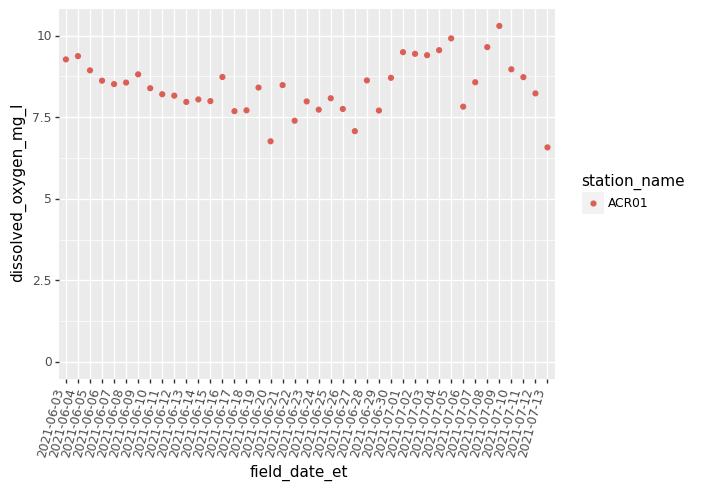

<ggplot: (8764153898733)>

In [73]:
(ggplot(df_data_vis, aes('field_date_et', parameter_input, color='station_name'))
 + geom_point()
 + theme(axis_text_x=element_text(rotation=75, hjust=1))
 + aes(ymin=0))

In [74]:
print(f"field_date_et values between {min(df_data_vis['field_date_et'])} and {max(df_data_vis['field_date_et'])}")

field_date_et values between 2021-06-03 and 2021-07-13


In [67]:
#@title Please select a min and max date between the values above
#@markdown Date Selector

min_date = '2020-08-03'  #@param {type: "date"}
min_date_param = datetime.datetime.strptime(min_date, "%Y-%m-%d").date()

max_date = '2020-09-05'  #@param {type: "date"}
max_date_param = datetime.datetime.strptime(max_date, "%Y-%m-%d").date()

#@markdown ---

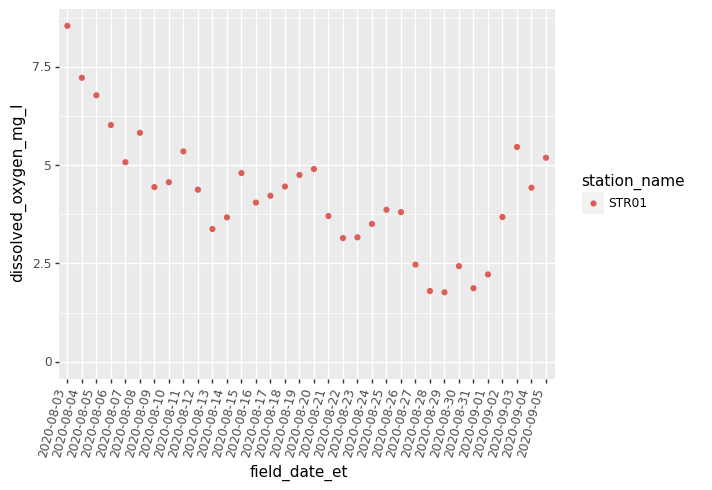

<ggplot: (8764153635941)>

In [68]:
df_data_vis_date_filtered = df_data_vis[(df_data_vis["field_date_et"] >= min_date_param) & (df_data_vis["field_date_et"] <= max_date_param)]

(ggplot(df_data_vis_date_filtered, aes('field_date_et', parameter_input, color='station_name'))
 + geom_point()
 + theme(axis_text_x=element_text(rotation=75, hjust=1))
 + aes(ymin=0))